In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
import statsmodels.api as sm

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

# 디렉토리 확인 및 데이터 로드 

In [2]:
%pwd

'C:\\Users\\김도연'

In [3]:
%ls 

 C 드라이브의 볼륨: Windows
 볼륨 일련 번호: 949E-3DEA

 C:\Users\김도연 디렉터리

2021-02-14  오후 10:12         4,091,870  EDA of bookings and ML to predict cancelations.ipynb
2021-03-02  오후 08:13    <DIR>          .
2021-03-02  오후 08:13    <DIR>          ..
2019-11-08  오후 10:04    <DIR>          .android
2020-11-24  오후 10:39               260 .bash_history
2021-03-03  오전 12:20    <DIR>          .conda
2021-03-02  오후 09:57                43 .condarc
2021-03-01  오전 01:28             1,831 .gitignore
2021-03-02  오후 08:11    <DIR>          .ipynb_checkpoints
2020-11-10  오후 06:42    <DIR>          .ipython
2021-03-02  오후 08:28    <DIR>          .jupyter
2020-12-08  오후 01:27    <DIR>          .LdVirtualBox
2021-02-03  오후 06:24    <DIR>          .matplotlib
2021-02-13  오후 11:57         1,778,302 03-apt-price-eda-output.ipynb
2021-02-14  오전 01:43           121,691 04-coffee-store-choropleth.html
2021-02-14  오전 12:17            29,035 04-coffee-store-input.ipynb
2021-02-14  오전 01:44         4,569,648 04-coffee-st

In [2]:
df = pd.read_csv("project2\Card.csv")
df.shape

(24697792, 12)

# 데이터 메모리 최소화 작업

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   REG_YYMM      int64 
 1   CARD_SIDO_NM  object
 2   CARD_CCG_NM   object
 3   STD_CLSS_NM   object
 4   HOM_SIDO_NM   object
 5   HOM_CCG_NM    object
 6   AGE           object
 7   SEX_CTGO_CD   int64 
 8   FLC           int64 
 9   CSTMR_CNT     int64 
 10  AMT           int64 
 11  CNT           int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [3]:
df['SEX_CTGO_CD']=df['SEX_CTGO_CD'].astype('category')

In [4]:
df['CNT']=df['CNT'].astype('int32')

In [5]:
df['FLC']=df['FLC'].astype('category')

In [29]:
df['CSTMR_CNT']=df['CSTMR_CNT'].astype('int32')

In [30]:
df['REG_YYMM']=df['REG_YYMM'].astype('int32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 11 columns):
 #   Column  Dtype   
---  ------  -----   
 0   매장_시도   object  
 1   업종명     object  
 2   고객_시도   object  
 3   연령대     int32   
 4   성별      category
 5   가구생애주기  category
 6   이용고객수   int32   
 7   이용금액    int64   
 8   이용건수    int32   
 9   년       int64   
 10  월       int64   
dtypes: category(2), int32(3), int64(3), object(3)
memory usage: 1.4+ GB


In [11]:
pd.options.display.float_format = '{:.2f}'.format

In [12]:
df.describe()

,REG_YYMM,CSTMR_CNT,AMT,CNT
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,201923.06,61.97,2441352.94,126.04
std,36.20,355.92,17260959.04,966.94
min,201901.00,3.00,20.00,1.00
25%,201904.00,4.00,90200.00,5.00
50%,201908.00,8.00,252680.00,12.00
75%,201911.00,24.00,843337.25,40.00
max,202003.00,32813.00,2349523701.00,120357.00


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column        Dtype   
---  ------        -----   
 0   REG_YYMM      int32   
 1   CARD_SIDO_NM  object  
 2   CARD_CCG_NM   object  
 3   STD_CLSS_NM   object  
 4   HOM_SIDO_NM   object  
 5   HOM_CCG_NM    object  
 6   AGE           object  
 7   SEX_CTGO_CD   category
 8   FLC           category
 9   CSTMR_CNT     int32   
 10  AMT           int64   
 11  CNT           int32   
dtypes: category(2), int32(3), int64(1), object(6)
memory usage: 1.6+ GB


In [31]:
# 연령대 숫자형으로 변환 
df['AGE'] = df['AGE'].str.rstrip('s').astype('int')
df.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40,1,4,3,1047300,3


In [3]:
# 열 이름 변경
df.columns = ['연월','매장_시도','매장_시군구','업종명','고객_시도','고객_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
df.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column  Dtype         
---  ------  -----         
 0   연월      datetime64[ns]
 1   매장_시도   object        
 2   매장_시군구  object        
 3   업종명     object        
 4   고객_시도   object        
 5   고객_시군구  object        
 6   연령대     int32         
 7   성별      category      
 8   가구생애주기  category      
 9   이용고객수   int32         
 10  이용금액    int64         
 11  이용건수    int32         
dtypes: category(2), datetime64[ns](1), int32(3), int64(1), object(5)
memory usage: 1.6+ GB


In [18]:
df.head(1)

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,강원,강릉시,건강보조식품 소매업,강원,강릉시,20,1,1,4,311200,4


# 결측치 처리 

In [19]:
df.isnull().sum()

연월             0
매장_시도          0
매장_시군구     87213
업종명            0
고객_시도          0
고객_시군구    147787
연령대            0
성별             0
가구생애주기         0
이용고객수          0
이용금액           0
이용건수           0
dtype: int64

<AxesSubplot:>

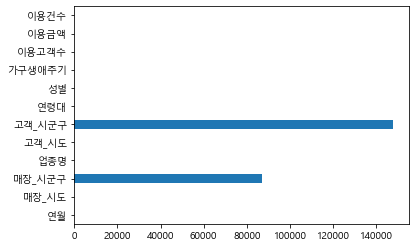

In [20]:
df.isnull().sum().plot.barh()

In [21]:
df[df['고객_시군구'].isnull()]['고객_시도'].value_counts()

세종    147787
Name: 고객_시도, dtype: int64

In [4]:
df['고객_시군구']=df['고객_시도'].fillna('세종시')

In [23]:
df.isnull().sum()

연월            0
매장_시도         0
매장_시군구    87213
업종명           0
고객_시도         0
고객_시군구        0
연령대           0
성별            0
가구생애주기        0
이용고객수         0
이용금액          0
이용건수          0
dtype: int64

In [24]:
df[df['매장_시군구'].isnull()]['매장_시도'].value_counts()

세종    87213
Name: 매장_시도, dtype: int64

In [5]:
df['매장_시군구']=df['매장_시도'].fillna('세종시')

In [26]:
df.isnull().sum()

연월        0
매장_시도     0
매장_시군구    0
업종명       0
고객_시도     0
고객_시군구    0
연령대       0
성별        0
가구생애주기    0
이용고객수     0
이용금액      0
이용건수      0
dtype: int64

# 이상치 확인

In [27]:
df.describe()

,연령대,이용고객수,이용금액,이용건수
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,38.23,61.97,2441352.94,126.04
std,14.33,355.92,17260959.04,966.94
min,10.00,3.00,20.00,1.00
25%,30.00,4.00,90200.00,5.00
50%,40.00,8.00,252680.00,12.00
75%,50.00,24.00,843337.25,40.00
max,70.00,32813.00,2349523701.00,120357.00


이용금액과 이용건수의 최대값이 3분위와 차이가 크다.

## 이용금액 기준 3분위수 이상 데이터 특이점

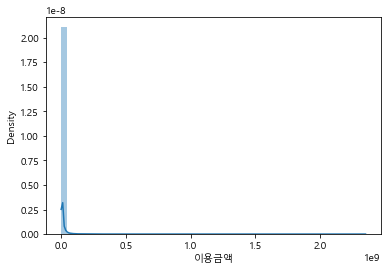

In [28]:
sns.distplot(df['이용금액']);

In [29]:
df.describe()

,연령대,이용고객수,이용금액,이용건수
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,38.23,61.97,2441352.94,126.04
std,14.33,355.92,17260959.04,966.94
min,10.00,3.00,20.00,1.00
25%,30.00,4.00,90200.00,5.00
50%,40.00,8.00,252680.00,12.00
75%,50.00,24.00,843337.25,40.00
max,70.00,32813.00,2349523701.00,120357.00


In [35]:
df_high=df[df['이용금액']>=843337.25]
df_high

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
1,201901,강원,강원,건강보조식품 소매업,강원,강원,30,1,2,7,1374500,8
3,201901,강원,강원,건강보조식품 소매업,강원,강원,40,1,3,4,1717000,5
4,201901,강원,강원,건강보조식품 소매업,강원,강원,40,1,4,3,1047300,3
6,201901,강원,강원,건강보조식품 소매업,강원,강원,50,1,4,21,3690830,21
7,201901,강원,강원,건강보조식품 소매업,강원,강원,50,2,4,21,3573300,20
...,...,...,...,...,...,...,...,...,...,...,...,...
24697780,202003,충북,충북,화장품 및 방향제 소매업,충북,충북,50,1,4,66,5187100,79
24697781,202003,충북,충북,화장품 및 방향제 소매업,충북,충북,50,2,4,166,16603400,189
24697782,202003,충북,충북,화장품 및 방향제 소매업,충북,충북,60,1,5,45,5078720,52
24697783,202003,충북,충북,화장품 및 방향제 소매업,충북,충북,60,2,5,102,9341125,106


3분위 이상 이용금액 분포

In [31]:
df_high=df[df['이용금액']>=843337.25]

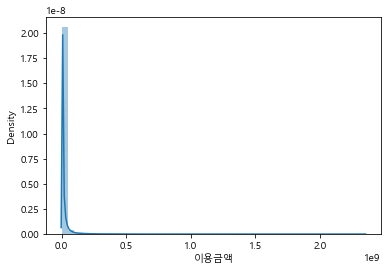

In [32]:
sns.distplot(df_high['이용금액']);

In [ ]:
plt.style.use( 'tableau-colorblind10' )
df.groupby('연령대')['이용금액'].mean().plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 카드 평균 이용 금액 ', size = 30 )
plt.show()

In [68]:
df_high_j=df_high[df_high(['매장_시도']=='제주')&(['업종명']=='한식 음식점업')]
df_high_j

TypeError: 'DataFrame' object is not callable

<AxesSubplot:xlabel='가구생애주기'>

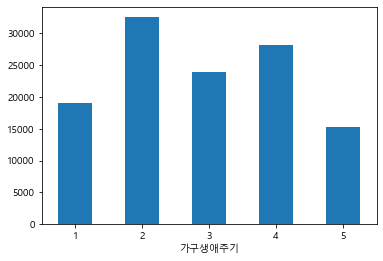

In [64]:
df_high_j.groupby('가구생애주기')['가구생애주기'].count().plot.bar(rot=0)

<AxesSubplot:xlabel='가구생애주기'>

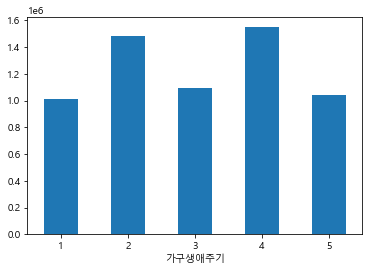

In [66]:
df_high.groupby('가구생애주기')['가구생애주기'].count().plot.bar(rot=0)

<AxesSubplot:xlabel='연령대'>

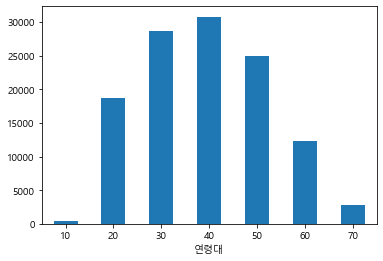

In [65]:
df_high_j.groupby('연령대')['연령대'].count().plot.bar(rot=0)

<AxesSubplot:xlabel='연령대'>

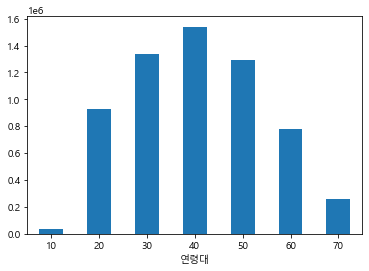

In [67]:
df_high.groupby('연령대')['연령대'].count().plot.bar(rot=0)

3분위 이하 이용금액 데이터 분포

In [33]:
df_low=df[df['이용금액']<843337.25]

<AxesSubplot:xlabel='이용금액', ylabel='Density'>

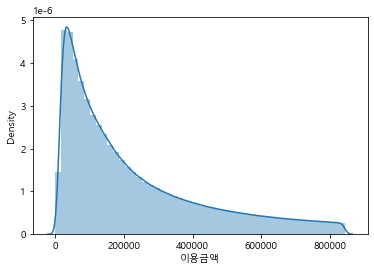

In [34]:
sns.distplot(df_low['이용금액'])

이용금액이 대부분 0~20000 값 사이에 분포하고 있음을 알 수 있다. 

* 영업점 시도 기준 이용금액 3분위 이상 데이터 분포

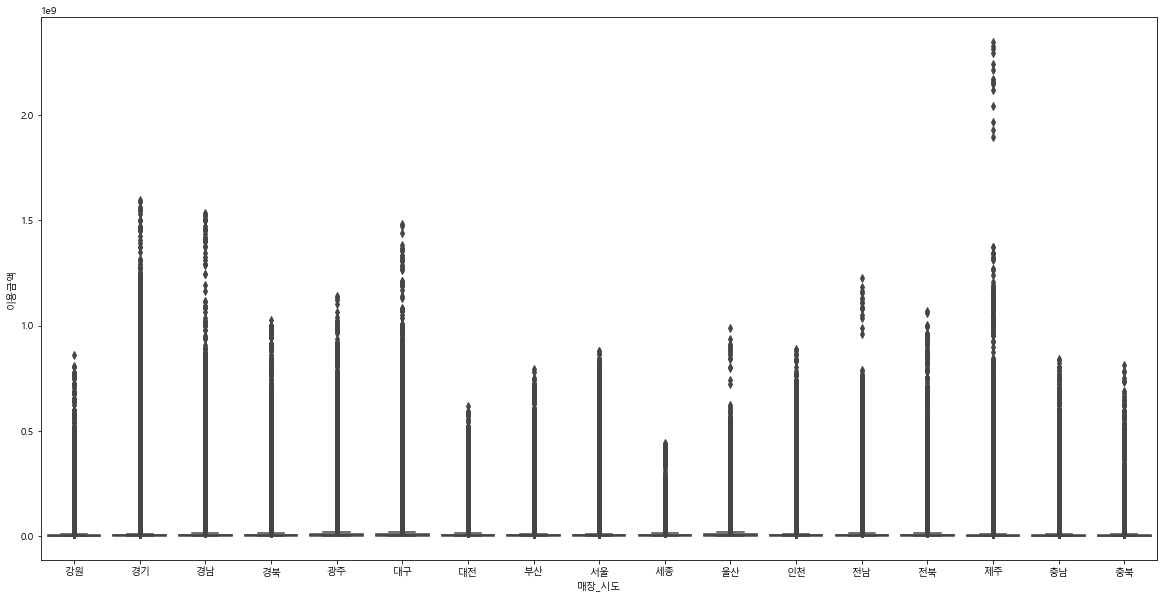

In [35]:
var='매장_시도'
data=pd.concat([df_high['이용금액'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)


영업점 시도 기준 이용금액 3분위 이하 데이터 분포

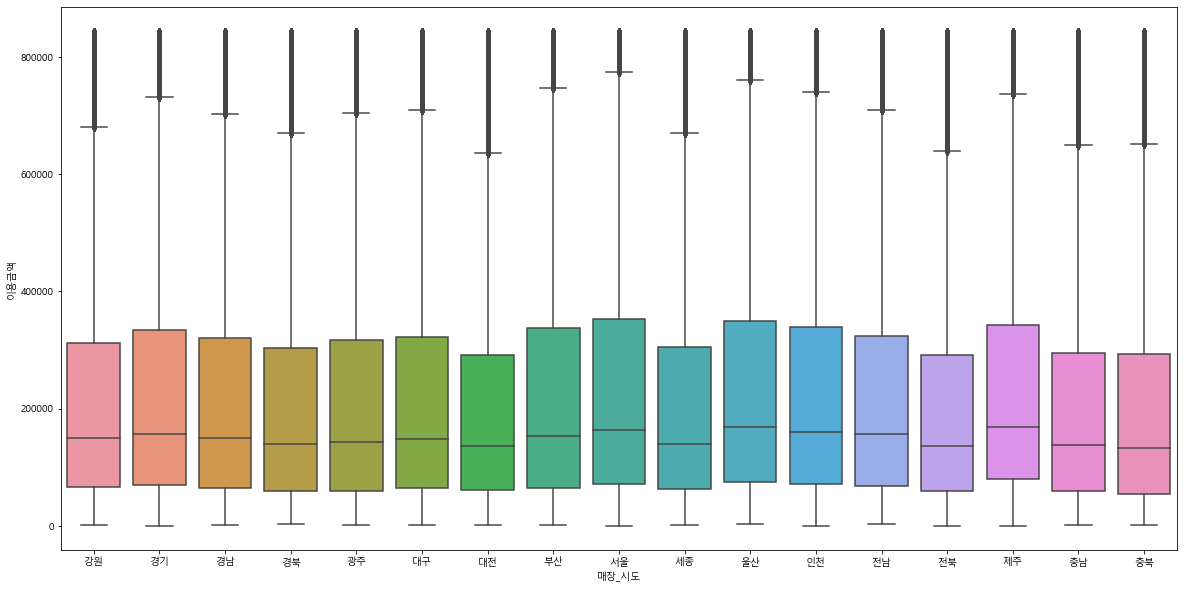

In [36]:
var='매장_시도'
data=pd.concat([df_low['이용금액'],df_low[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)


고객 주소지 시도 기준 이용금액 3분위 이상 데이터 분포

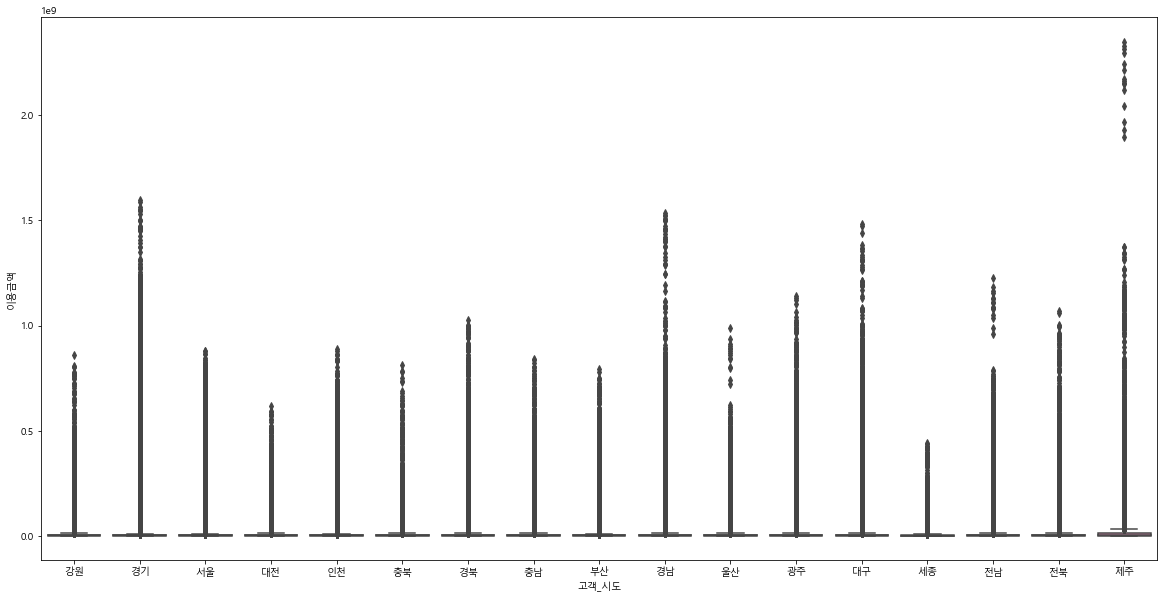

In [37]:
var='고객_시도'
data=pd.concat([df_high['이용금액'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)


고객 주소지 시도 기준 이용금액 3분위 이하 데이터 분포

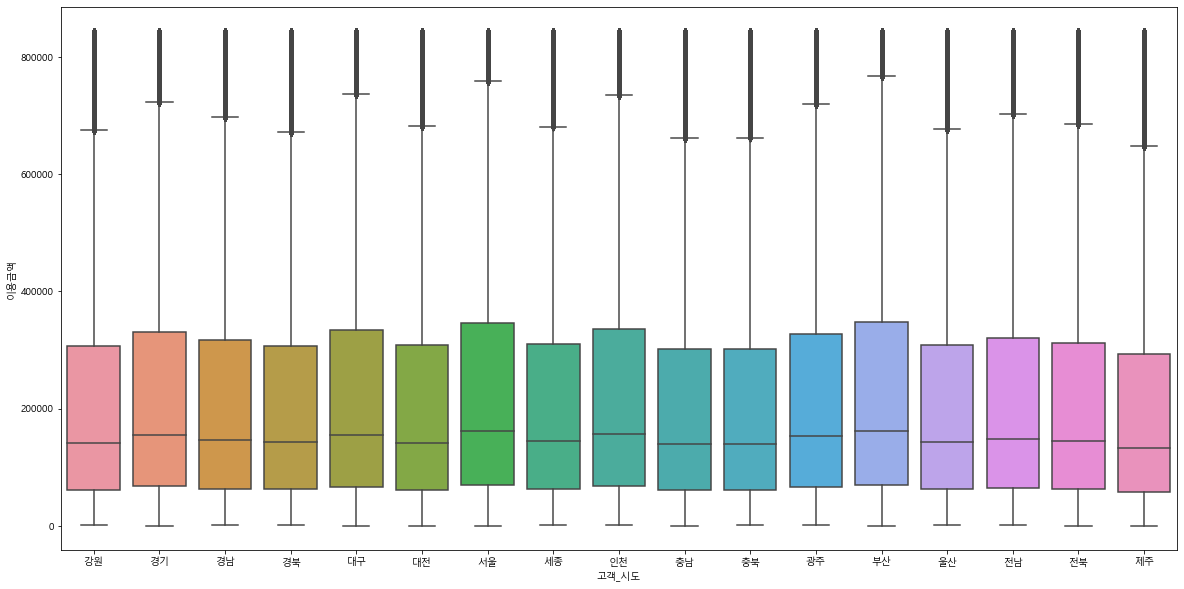

In [38]:
var='고객_시도'
data=pd.concat([df_low['이용금액'],df_low[var]],axis=1)
f, ax= plt.subplots(figsize=(20,10))
fig= sns.boxplot(x=var, y='이용금액',data=data)

제주도에 거주지를 갖고 있는 고객이 제주도 내에 영업점에서  이용금액가 가장 높게 나타났다. 

In [39]:
df[df['매장_시도']=='제주'].sort_values('이용금액',ascending=False).head(10)

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
13451048,2019-08-01,제주,제주,한식 음식점업,제주,제주,50,1,4,32813,2349523701,59062
20295408,2019-12-01,제주,제주,한식 음식점업,제주,제주,50,1,4,31378,2328668609,56556
8146986,2019-05-01,제주,제주,한식 음식점업,제주,제주,50,1,4,31932,2314765651,57064
1488125,2019-01-01,제주,제주,한식 음식점업,제주,제주,50,1,4,30513,2293735545,55470
11592263,2019-07-01,제주,제주,한식 음식점업,제주,제주,50,1,4,31609,2242949391,56776
4734109,2019-03-01,제주,제주,한식 음식점업,제주,제주,50,1,4,30985,2214022562,55085
21964388,2020-01-01,제주,제주,한식 음식점업,제주,제주,50,1,4,29610,2170470327,52722
16947263,2019-10-01,제주,제주,한식 음식점업,제주,제주,50,1,4,31265,2162859129,57105
9867226,2019-06-01,제주,제주,한식 음식점업,제주,제주,50,1,4,31060,2153175872,55044
6385785,2019-04-01,제주,제주,한식 음식점업,제주,제주,50,1,4,30641,2149619954,53793


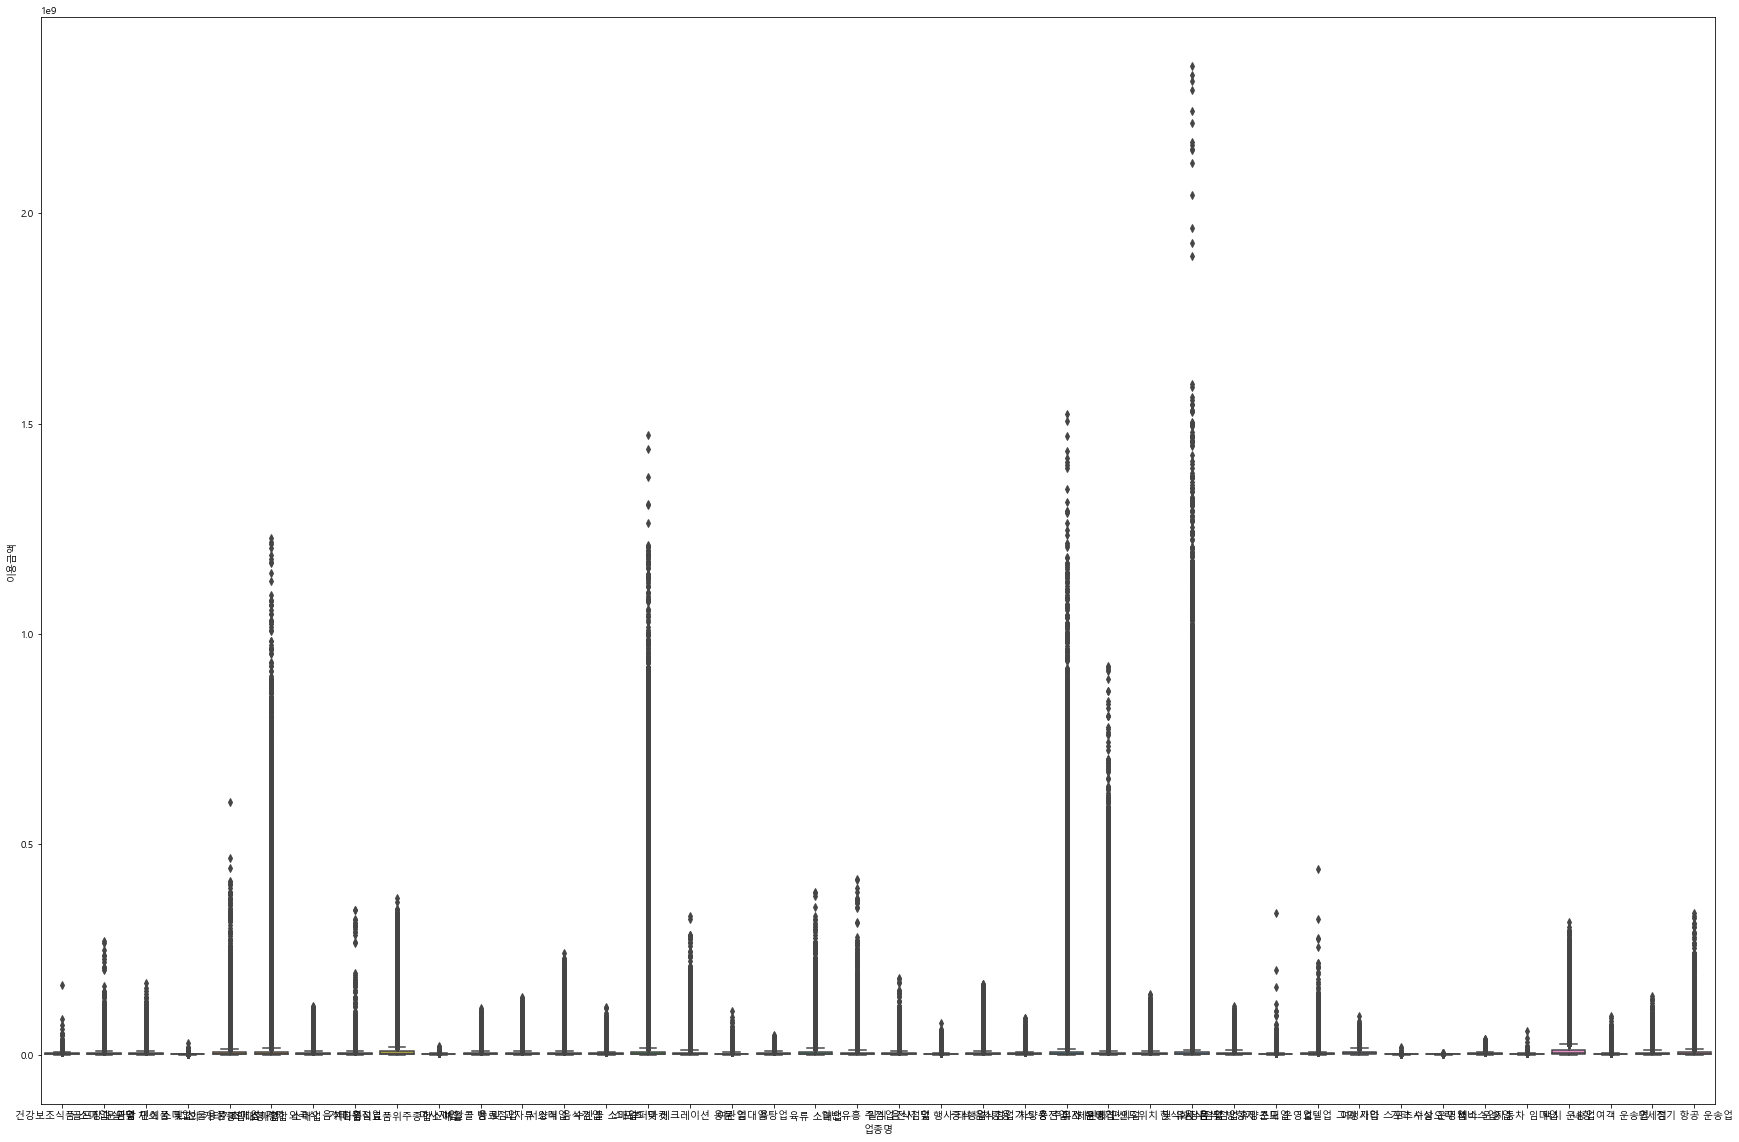

In [40]:
var='업종명'
data=pd.concat([df_high['이용금액'],df_high[var]],axis=1)
f, ax= plt.subplots(figsize=(30,20))
fig= sns.boxplot(x=var, y='이용금액',data=data)


In [41]:
data.sort_values(by='이용금액',ascending=False)

,이용금액,업종명
13451048,2349523701,한식 음식점업
20295408,2328668609,한식 음식점업
8146986,2314765651,한식 음식점업
1488125,2293735545,한식 음식점업
11592263,2242949391,한식 음식점업
...,...,...
11053783,843340,그외 기타 종합 소매업
5401000,843339,차량용 주유소 운영업
22207332,843339,차량용 주유소 운영업
1482270,843338,차량용 가스 충전업


가장 이용금액가 높았던 업종은 한식 음식점업이었다.

In [42]:
pd.DataFrame(df.groupby('연월')['이용금액'].sum()).reset_index()

,연월,이용금액
0,2019-01-01,4052317259025
1,2019-02-01,3634345832156
2,2019-03-01,4105409759731
3,2019-04-01,4006698507386
4,2019-05-01,4345471235813
5,2019-06-01,4122105394194
6,2019-07-01,4187299694709
7,2019-08-01,4268655968810
8,2019-09-01,4123348058794
9,2019-10-01,4176583723584


# 데이터 제거

In [43]:
df.head()

,연월,매장_시도,매장_시군구,업종명,고객_시도,고객_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,2019-01-01,강원,강원,건강보조식품 소매업,강원,강원,20,1,1,4,311200,4
1,2019-01-01,강원,강원,건강보조식품 소매업,강원,강원,30,1,2,7,1374500,8
2,2019-01-01,강원,강원,건강보조식품 소매업,강원,강원,30,2,2,6,818700,6
3,2019-01-01,강원,강원,건강보조식품 소매업,강원,강원,40,1,3,4,1717000,5
4,2019-01-01,강원,강원,건강보조식품 소매업,강원,강원,40,1,4,3,1047300,3


In [6]:
df=df.drop(['매장_시군구','고객_시군구'],axis=1)
df.head()

,연월,매장_시도,업종명,고객_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8
2,201901,강원,건강보조식품 소매업,강원,30s,2,2,6,818700,6
3,201901,강원,건강보조식품 소매업,강원,40s,1,3,4,1717000,5
4,201901,강원,건강보조식품 소매업,강원,40s,1,4,3,1047300,3


# EDA

In [46]:
df.describe().round(2)

,연령대,이용고객수,이용금액,이용건수
count,24697792.00,24697792.00,24697792.00,24697792.00
mean,38.23,61.97,2441352.94,126.04
std,14.33,355.92,17260959.04,966.94
min,10.00,3.00,20.00,1.00
25%,30.00,4.00,90200.00,5.00
50%,40.00,8.00,252680.00,12.00
75%,50.00,24.00,843337.25,40.00
max,70.00,32813.00,2349523701.00,120357.00


In [47]:
print( df.매장_시도.unique() )
df_card_sido= pd.DataFrame( df.매장_시도.value_counts().sort_index(ascending=True)  )
df_card_sido



['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']


,매장_시도
강원,1230355
경기,5188230
경남,1222818
경북,1204831
광주,432150
대구,758424
대전,523121
부산,2030810
서울,6259502
세종,87213


In [48]:
print( df.고객_시도.unique() )
df_sido= pd.DataFrame( df.고객_시도.value_counts().sort_index(ascending=True)  )
df_sido

['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']


,고객_시도
강원,602004
경기,6614016
경남,1463499
경북,1068082
광주,667626
대구,1077209
대전,586938
부산,1960951
서울,5387540
세종,147787


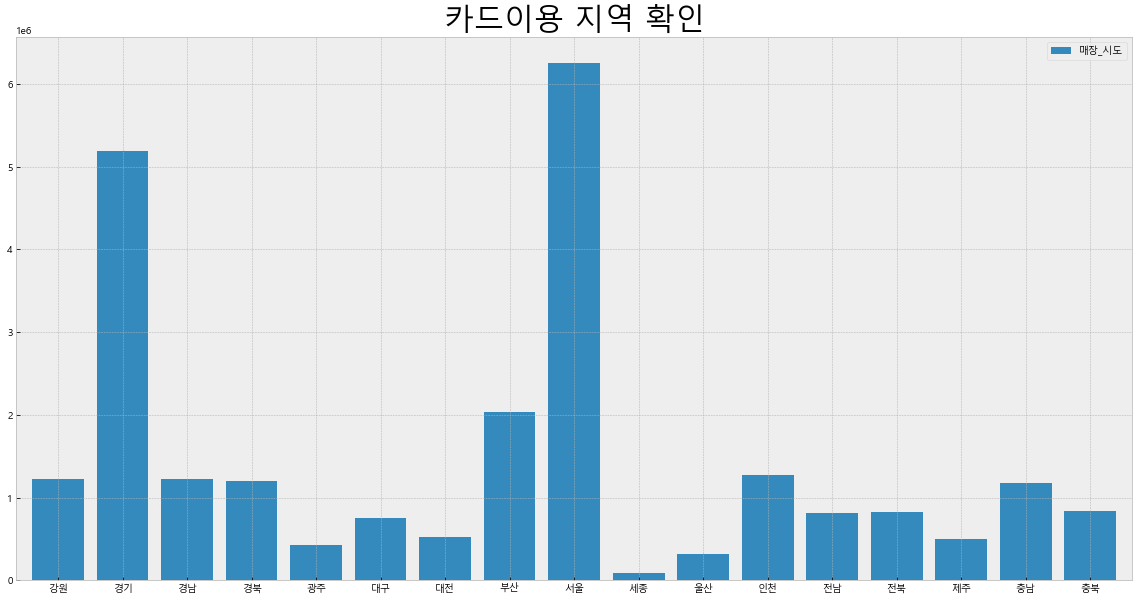

In [49]:
plt.style.use( 'bmh' )
df_card_sido.plot( kind = 'bar', figsize = ( 20,10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드이용 지역 확인', size = 30 )
plt.show()



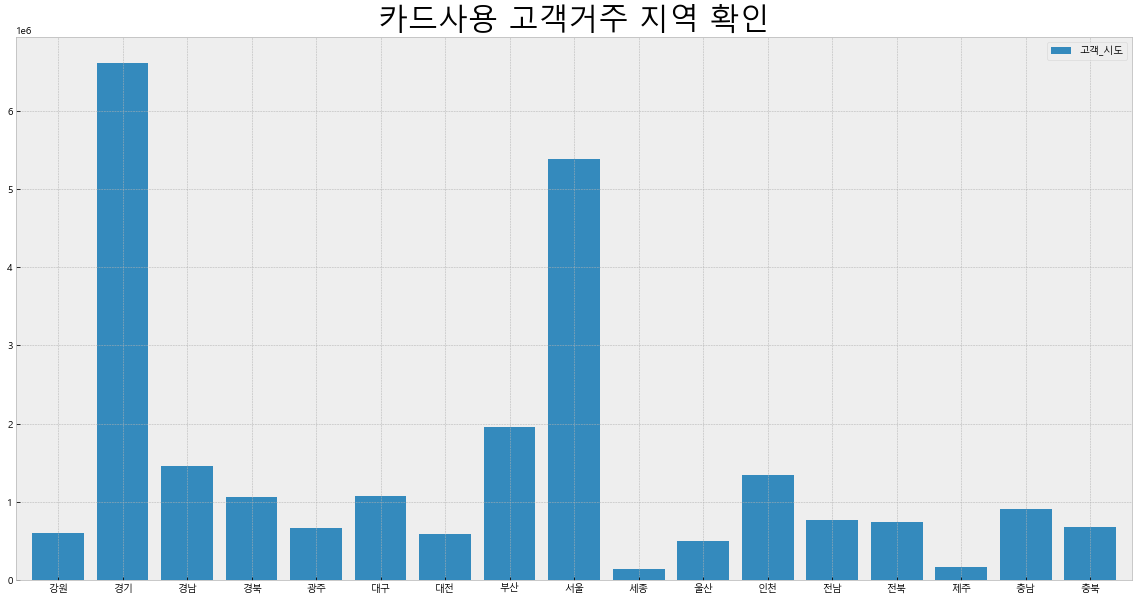

In [50]:
plt.style.use( 'bmh' )
df_sido.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드사용 고객거주 지역 확인', size = 30 )
plt.show()

경기에 사는 고객이 서울에서 오프라인 신용카드 결제를 많이 한다는 것을 알 수 있다.

<AxesSubplot:xlabel='연월', ylabel='이용금액'>

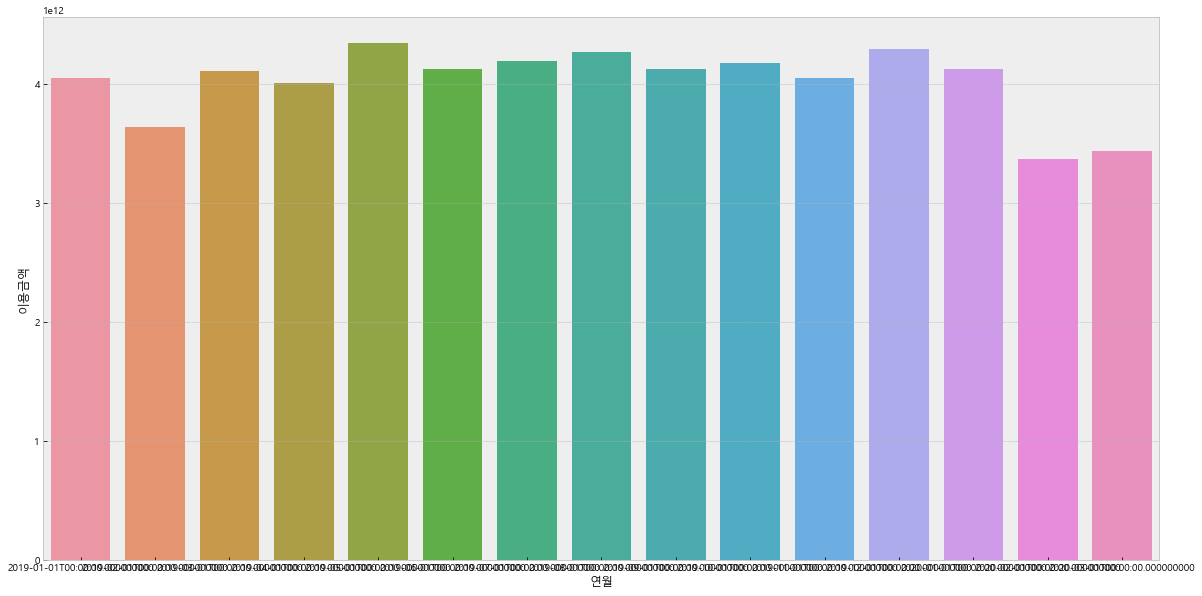

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(data=pd.DataFrame(df.groupby('연월')['이용금액'].sum()).reset_index(),x='연월',y='이용금액',ci=None)

코로나 (2020년 02월)이후로 감소했지만 이외 뚜렷한 특징은 찾기 힘들다

In [7]:
# 날짜데이터를 년과 월로 분리 
# 사용자 함수 정의 
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [8]:
df['년']=df['연월'].apply(lambda x:grap_year(x))
df['월']=df['연월'].apply(lambda x:grap_month(x))
df=df.drop(['연월'],axis=1)



In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 11 columns):
 #   Column  Dtype   
---  ------  -----   
 0   매장_시도   object  
 1   업종명     object  
 2   고객_시도   object  
 3   연령대     int32   
 4   성별      category
 5   가구생애주기  category
 6   이용고객수   int32   
 7   이용금액    int64   
 8   이용건수    int32   
 9   년       int64   
 10  월       int64   
dtypes: category(2), int32(3), int64(3), object(3)
memory usage: 1.4+ GB


<AxesSubplot:xlabel='년,월'>

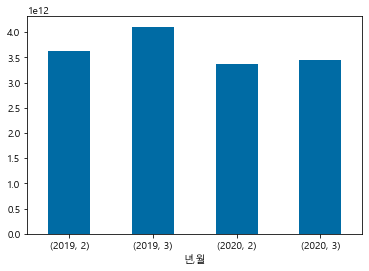

In [109]:
# 2020년 02월 이후 
# 전년도 해당월과 카드이용총액 비교 

df_co=df[(df['월'] ==2) | (df['월']==3)]
df_co.groupby(['년','월'])['이용금액'].sum().plot.bar(rot=0)

In [119]:
##코로나 이후 카드사용총액 증감율

df_co.groupby(['년','월'])['이용금액'].sum().pct_change(periods=2)*100

년     월
2019  2          NaN
      3          NaN
2020  2    -7.254425
      3   -16.259652
Name: 이용금액, dtype: float64

In [207]:
#업종별 
df_store=df_co.groupby(['년','월','업종명'])['이용금액'].sum().pct_change(periods=82)*100


In [212]:
df_store=df_store.to_frame().reset_index()


In [217]:
df_store.columns=['년','월','업종명','증감률']
df_store

,년,월,업종명,증감률
0,2019,2,건강보조식품 소매업,NaN
1,2019,2,골프장 운영업,NaN
2,2019,2,과실 및 채소 소매업,NaN
3,2019,2,관광 민예품 및 선물용품 소매업,NaN
4,2019,2,그외 기타 분류안된 오락관련 서비스업,NaN
...,...,...,...,...
159,2020,3,피자 햄버거 샌드위치 및 유사 음식점업,-12.852178
160,2020,3,한식 음식점업,-31.967545
161,2020,3,호텔업,-63.280926
162,2020,3,화장품 및 방향제 소매업,-36.333087


In [186]:
df_store=df_store.to_frame().reset_index()
df_store[df_store['년']==2020]

,년,월,업종명,이용금액
82,2020,2,건강보조식품 소매업,-30.612045
83,2020,2,골프장 운영업,12.712805
84,2020,2,과실 및 채소 소매업,-15.791247
85,2020,2,관광 민예품 및 선물용품 소매업,-36.410127
86,2020,2,그외 기타 분류안된 오락관련 서비스업,-36.452192
...,...,...,...,...
159,2020,3,피자 햄버거 샌드위치 및 유사 음식점업,-12.852178
160,2020,3,한식 음식점업,-31.967545
161,2020,3,호텔업,-63.280926
162,2020,3,화장품 및 방향제 소매업,-36.333087


In [52]:
print(df.업종명.unique())
print('업종수 : ',len(df.업종명.unique()))

['건강보조식품 소매업' '골프장 운영업' '과실 및 채소 소매업' '관광 민예품 및 선물용품 소매업'
 '그외 기타 스포츠시설 운영업' '그외 기타 종합 소매업' '기타 대형 종합 소매업' '기타 외국식 음식점업' '기타 주점업'
 '기타음식료품위주종합소매업' '마사지업' '비알콜 음료점업' '빵 및 과자류 소매업' '서양식 음식점업' '수산물 소매업'
 '슈퍼마켓' '스포츠 및 레크레이션 용품 임대업' '여관업' '욕탕업' '육류 소매업' '일반유흥 주점업' '일식 음식점업'
 '전시 및 행사 대행업' '중식 음식점업' '차량용 가스 충전업' '차량용 주유소 운영업' '체인화 편의점'
 '피자 햄버거 샌드위치 및 유사 음식점업' '한식 음식점업' '호텔업' '화장품 및 방향제 소매업' '휴양콘도 운영업' '여행사업'
 '자동차 임대업' '면세점' '버스 운송업' '택시 운송업' '기타 수상오락 서비스업' '내항 여객 운송업'
 '그외 기타 분류안된 오락관련 서비스업' '정기 항공 운송업']
업종수 :  41


In [53]:
df[df['업종명']=='한식 음식점업']['이용금액'].sum()

13737489719551

In [54]:
df_store=pd.DataFrame(df.groupby('업종명')['이용금액'].sum().sort_values(ascending=False))
df_store

,이용금액
업종명,
한식 음식점업,13737489719551
차량용 주유소 운영업,7708652073883
기타 대형 종합 소매업,7328854819388
슈퍼마켓,6730329364274
체인화 편의점,5303958703193
서양식 음식점업,1748358904526
택시 운송업,1733409541974
기타음식료품위주종합소매업,1569246626978
스포츠 및 레크레이션 용품 임대업,1245725426753


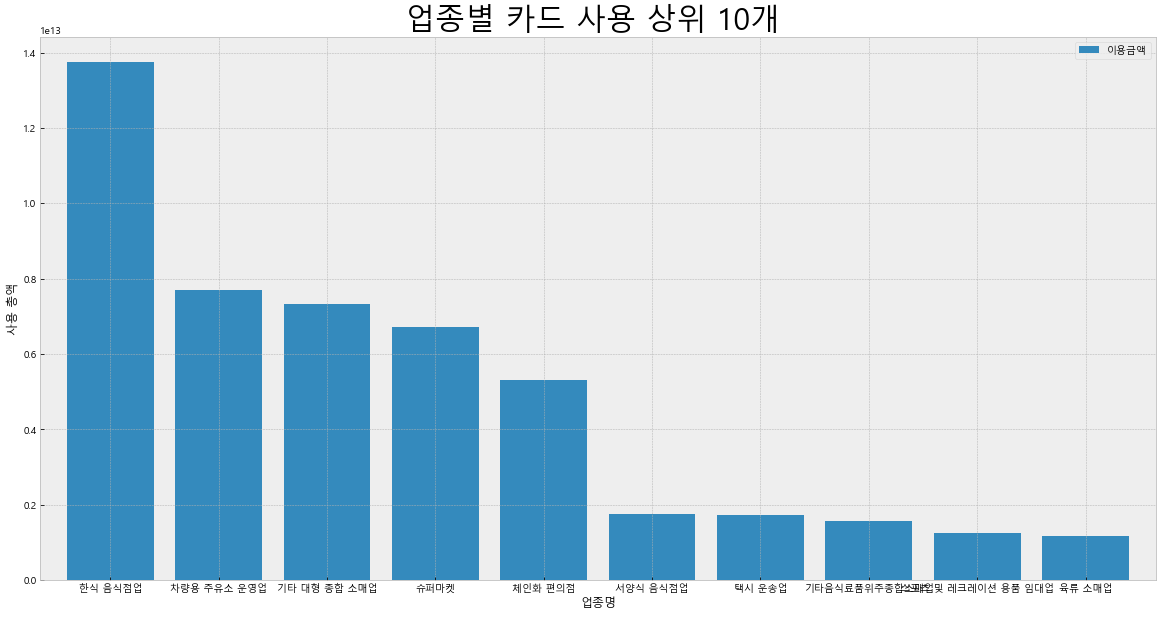

In [55]:
plt.style.use( 'bmh' )
df_store.head(10).plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('업종명')
plt.ylabel('사용 총액')
plt.title( '업종별 카드 사용 상위 10개 ', size = 30 )
plt.show()

In [56]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


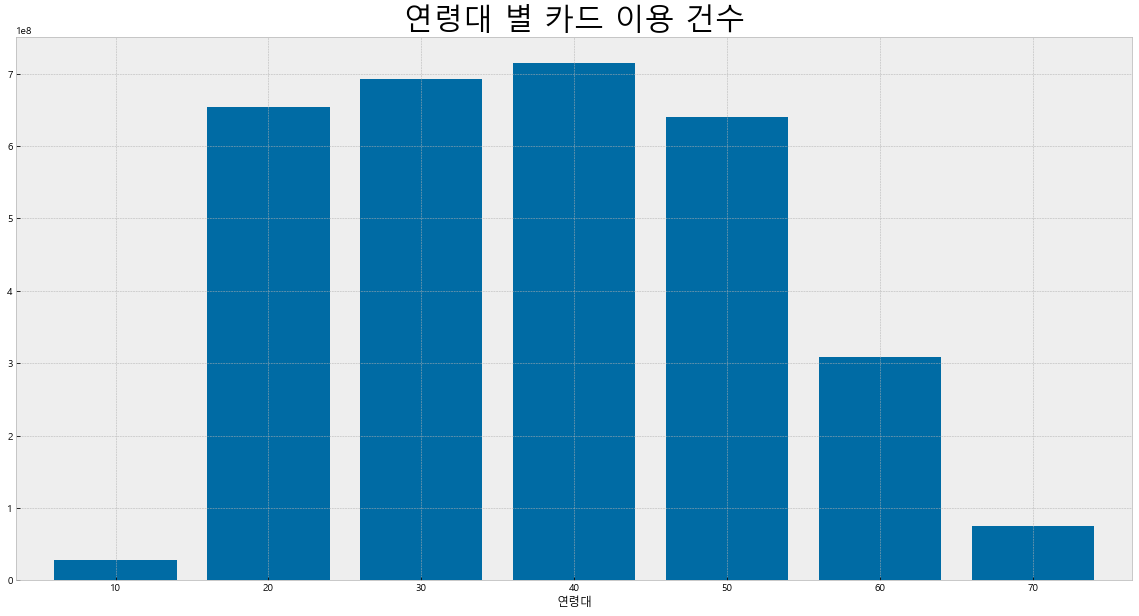

In [57]:
#연령대별 신용카드 이용 건수 합
plt.style.use('tableau-colorblind10' )
df.groupby('연령대')['이용건수'].sum().plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 카드 이용 건수', size = 30 )
plt.show()

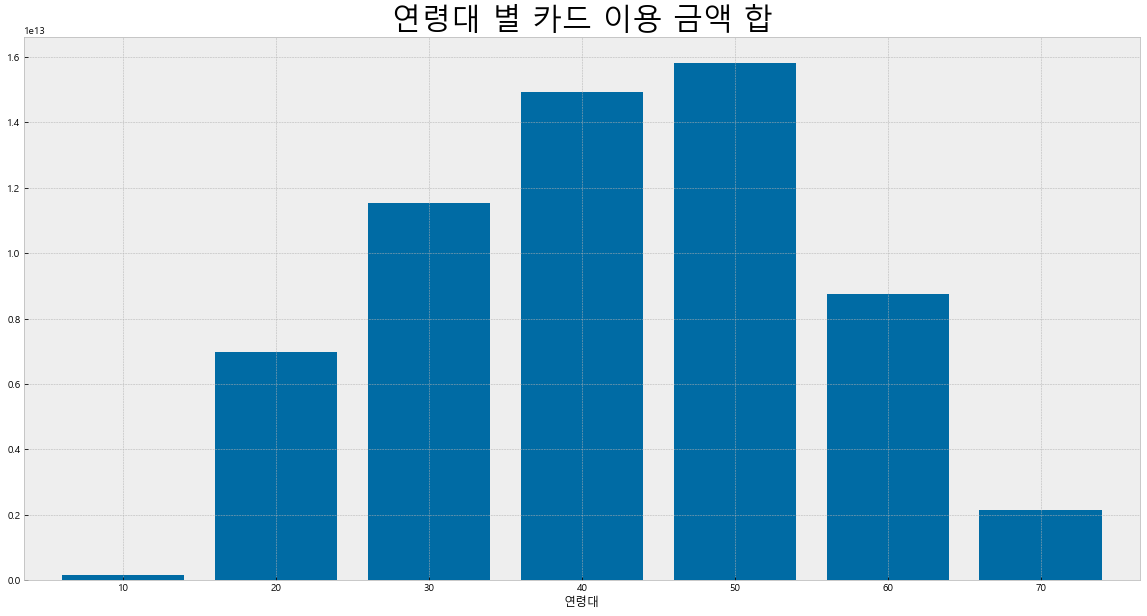

In [58]:
#연령대별 신용카드 이용금액 합 
plt.style.use( 'tableau-colorblind10' )
df.groupby('연령대')['이용금액'].sum().plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 카드 이용 금액 합', size = 30 )
plt.show()

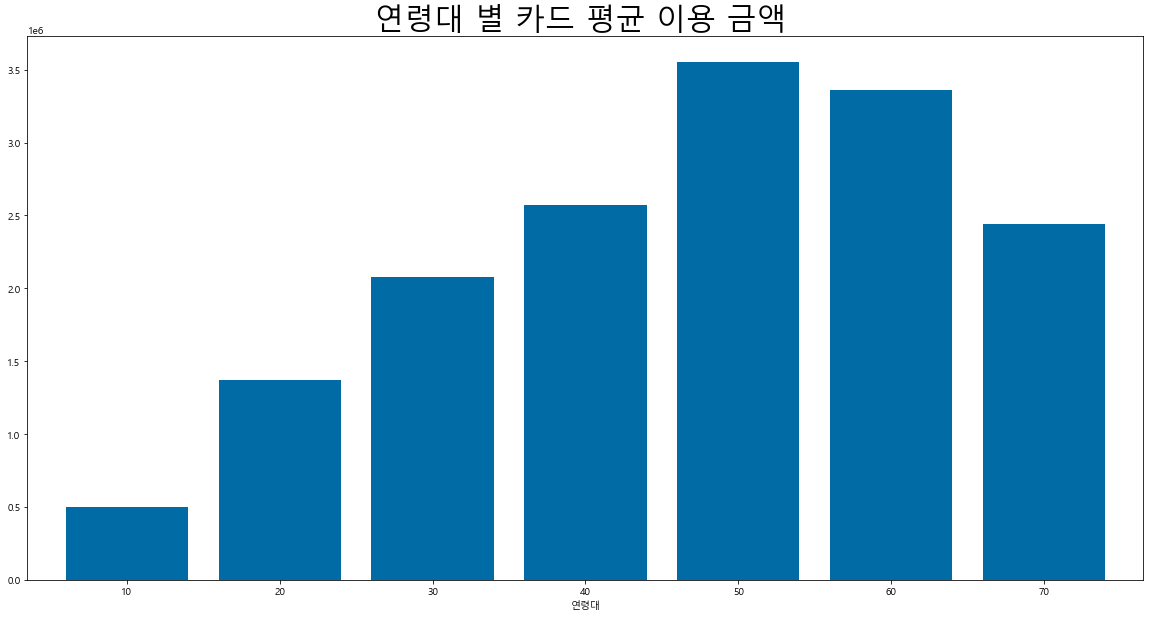

In [35]:
#연령대별 신용카드 평균이용금액  
plt.style.use( 'tableau-colorblind10' )
df.groupby('연령대')['이용금액'].mean().plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 카드 평균 이용 금액 ', size = 30 )
plt.show()

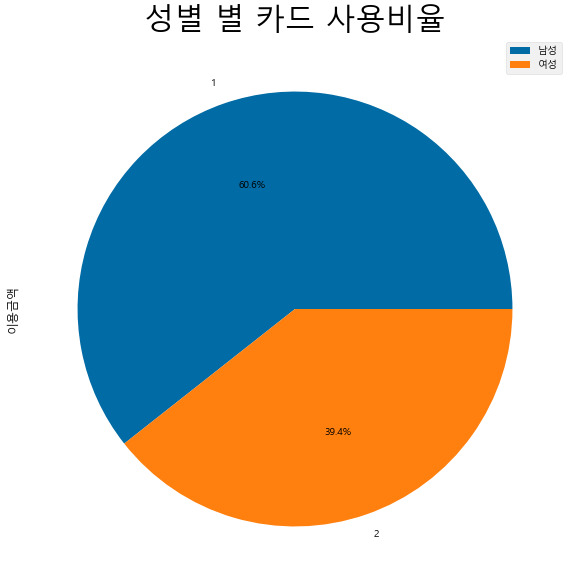

In [59]:
# 성별별 카드 사용비율
plt.style.use( 'tableau-colorblind10' )
df.groupby('성별')['이용금액'].sum().plot( kind = 'pie', figsize = ( 10, 10 ),autopct='%1.1f%%')
plt.title( '성별 별 카드 사용비율', size = 30 )
plt.legend(labels=('남성','여성'))
plt.show()

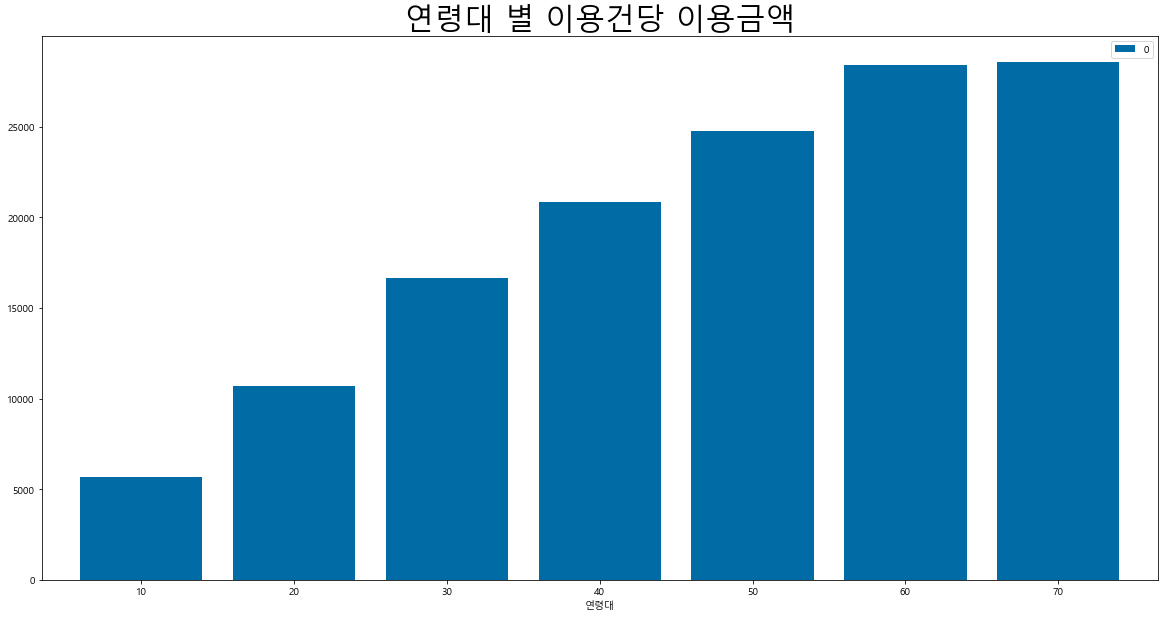

            0
연령대          
10    5649.82
20   10669.12
30   16630.85
40   20852.52
50   24735.72
60   28401.50
70   28550.26


In [55]:
a=df.groupby('연령대')['이용금액'].sum()
b=df.groupby('연령대')['이용건수'].sum()
plt.style.use( 'tableau-colorblind10' )
(a/b).round(2).to_frame().plot( kind = 'bar',figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 이용건당 이용금액', size = 30 )
plt.show()
print((a/b).round(2).to_frame())

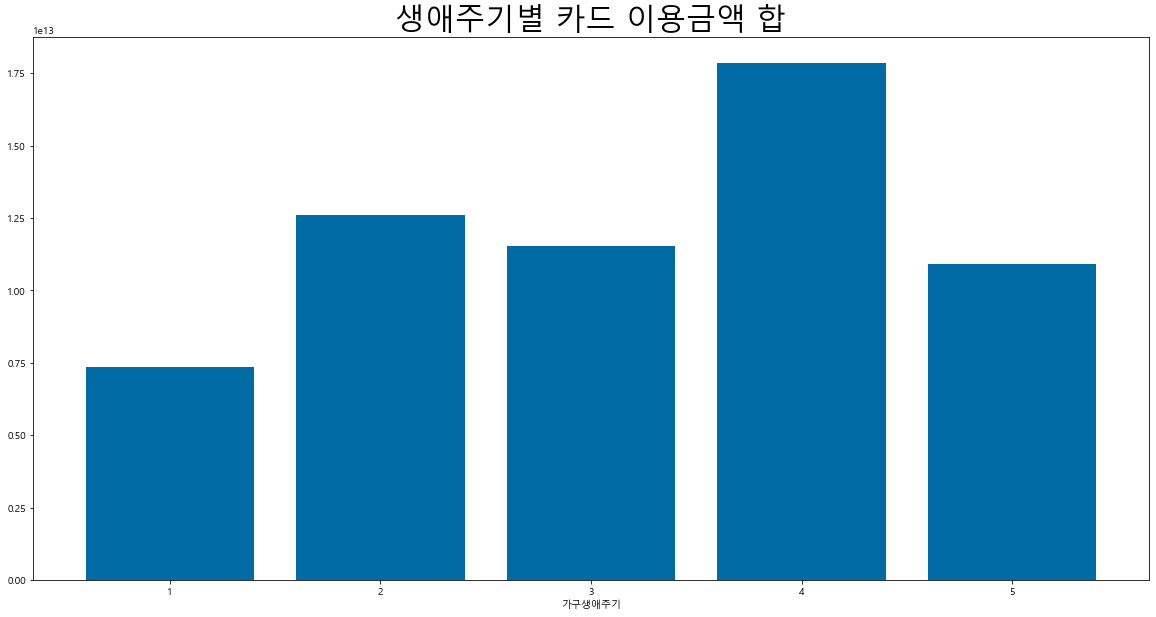

In [46]:
#생애 주기별 분포
plt.style.use( 'tableau-colorblind10' )
df.groupby('가구생애주기')['이용금액'].sum().plot( kind = 'bar',figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('가구생애주기')
plt.title( '생애주기별 카드 이용금액 합', size = 30 )
plt.show()

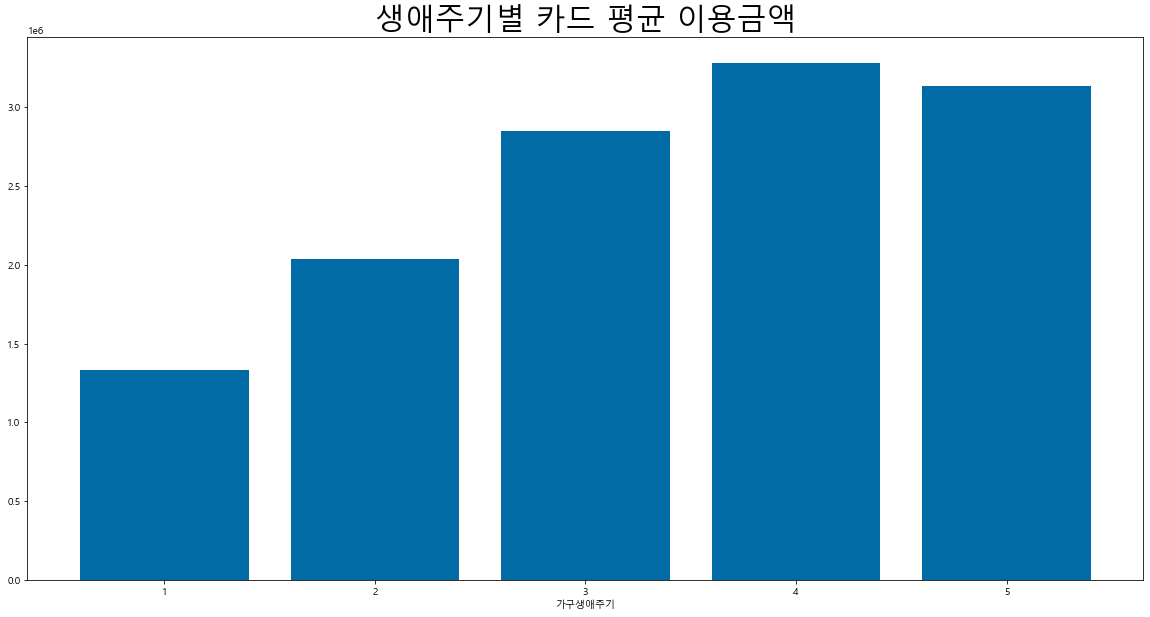

In [47]:
#연령대별 신용카드 이용금액 합 
plt.style.use( 'tableau-colorblind10' )
df.groupby('가구생애주기')['이용금액'].mean().plot( kind = 'bar',figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('가구생애주기')
plt.title( '생애주기별 카드 평균 이용금액', size = 30 )
plt.show()

In [17]:
df.groupby(['매장_시도','성별'])['이용금액'].sum()

매장_시도  성별
강원     1     1019422567091
       2      570188732828
경기     1     8661794600756
       2     5540090634113
경남     1     2304178777303
       2     1180951252561
경북     1     1877196231321
       2      890424363927
광주     1     1023179710022
       2      682470650912
대구     1     1694554554632
       2     1325509797972
대전     1      694241163056
       2      434672297660
부산     1     2578969699475
       2     1912336332066
서울     1     8190687845791
       2     6486443203240
세종     1      129540371792
       2       74505445556
울산     1      837354436562
       2      417859169178
인천     1     1848771565416
       2     1207475897497
전남     1     1263550774461
       2      576210002678
전북     1     1242817889230
       2      718412296111
제주     1      797625219172
       2      545957005596
충남     1     1418238579560
       2      684958795548
충북     1      971440019642
       2      493997166281
Name: 이용금액, dtype: int64

In [18]:
df.groupby(['고객_시도','성별'])['이용금액'].sum()

고객_시도  성별
강원     1      868385317969
       2      527648214350
경기     1     9448487819744
       2     6181306042098
경남     1     2487841899533
       2     1354373182642
경북     1     1762736548722
       2      904943604910
광주     1     1216375816633
       2      793259645350
대구     1     1973244020578
       2     1456166647292
대전     1      792424864352
       2      482424965007
부산     1     2647888258533
       2     1890021558562
서울     1     6819307805224
       2     5318304976636
세종     1      178083394415
       2      102995584632
울산     1      927373342357
       2      476050109323
인천     1     1956484438691
       2     1287409881364
전남     1     1231381030480
       2      571075202974
전북     1     1271332451927
       2      748857695656
제주     1      679348270769
       2      451268384791
충남     1     1366392341647
       2      679319873395
충북     1      926476383708
       2      517037474742
Name: 이용금액, dtype: int64

In [ ]:
#연령대별 신용카드 이용금액 합 
plt.style.use( 'tableau-colorblind10' )
df.groupby('연령대')['이용금액'].sum().plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.8 )
plt.xticks( rotation = 'horizontal' )
plt.xlabel('연령대')
plt.title( '연령대 별 카드 이용 금액 합', size = 30 )
plt.show()

In [28]:
max(df.groupby('매장_시도')['이용금액'].sum())

14677131049031

In [23]:
df[df['매장_시도']=='서울']['이용금액'].sum()

14677131049031

<AxesSubplot:xlabel='매장_시도', ylabel='이용금액'>

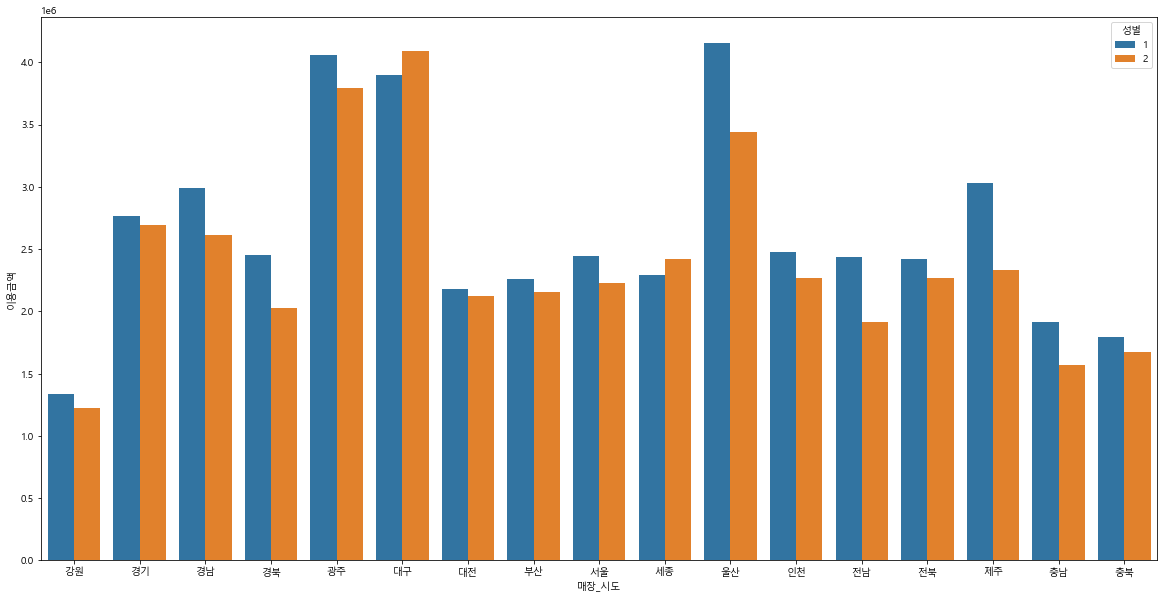

In [20]:
# 매장 주소지 별 성별별 카드 사용총액 

plt.figure(figsize=(20,10))
sns.barplot(x='매장_시도',y='이용금액',hue='성별',data=df,ci=None)

<AxesSubplot:xlabel='고객_시도', ylabel='이용금액'>

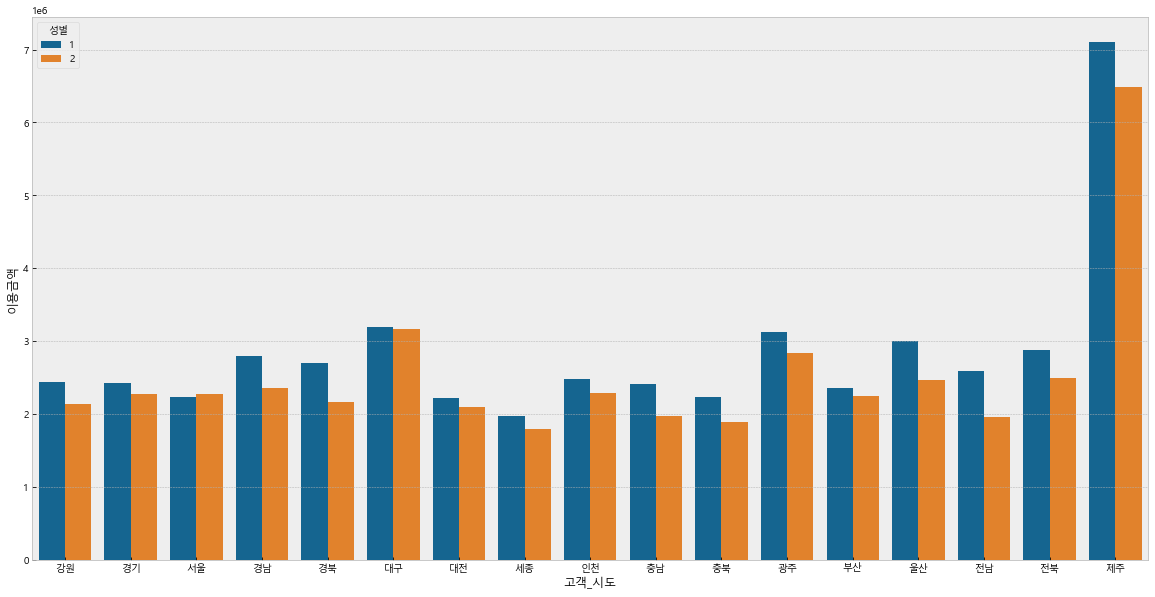

In [60]:
# 고객주소지 별 성별별 카드 사용총액 

plt.figure(figsize=(20,10))
sns.barplot(x='고객_시도',y='이용금액',hue='성별',data=df,ci=None)

<AxesSubplot:xlabel='매장_시도,성별'>

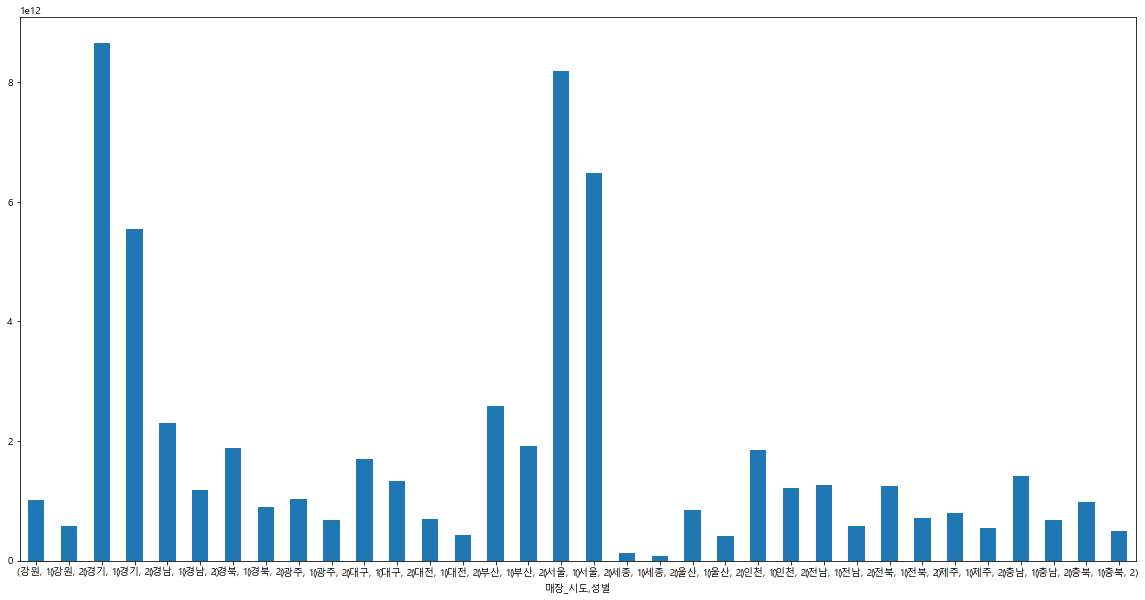

In [16]:
plt.figure(figsize=(20,10))
df.groupby(['매장_시도','성별'])['이용금액'].sum().plot.bar(rot=0)

<AxesSubplot:xlabel='고객_시도,성별'>

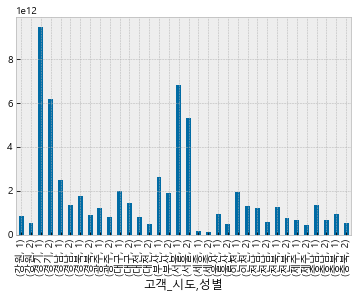

In [67]:
df.groupby(['고객_시도','성별'])['이용금액'].sum().plot.bar()

# 인코딩

In [9]:
# 인코딩
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

<AxesSubplot:>

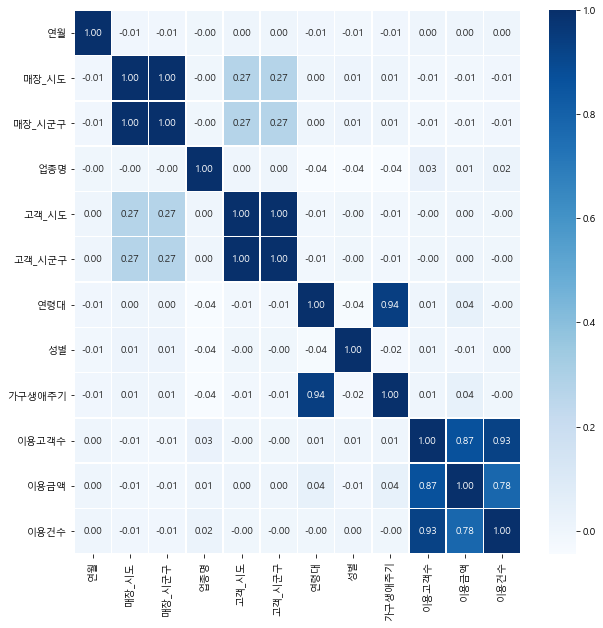

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(data = df_num.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# 모델학습 

In [53]:
df_test=pd.read_csv('project2\Test.csv')

In [10]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
train_features = train_num.drop(['이용고객수', '이용금액', '이용건수'], axis=1)
train_target = np.log1p(train_num['이용금액'])

In [11]:
# 훈련
model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(train_features, train_target)

KeyboardInterrupt: 

In [ ]:
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=train_features.columns)